In [1]:
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('train/0/Training_3908.jpg')

In [3]:
img.shape #rgb

(48, 48, 3)

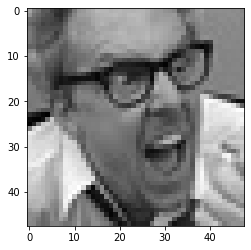

In [5]:
plt.imshow(img)

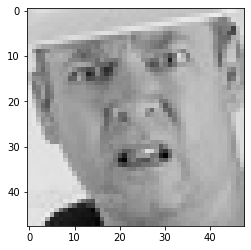

In [6]:
directory = 'train/'
expressions = ['0','1','2','3','4','5','6']
for i in expressions:
    path = os.path.join(directory, i)
    for J in os.listdir(path):
        img = cv2.imread(os.path.join(path, J))
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [7]:
##resize images
size = 224
new_array = cv2.resize(img,(size,size))
new_array.shape

(224, 224, 3)

In [8]:
#convert images into array for transfer learning
training_imgs = []

def create_data():
    for i in expressions:
        path = os.path.join(directory, i)
        class_num = expressions.index(i)
        for img in os.listdir(path):
            try:
                array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(array, (size,size))
                training_imgs.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_data()

In [10]:
import random
#shuffle to break the sequence of imgs
random.shuffle(training_imgs)
#convert to array to see the shape
temp = np.array(training_imgs)
print(temp.shape)

(441, 2)


In [11]:
X = []
y = []

for features,expression in training_imgs:
    X.append(features)
    y.append(expression)

#converting it into 4 dimensions since mobile nets uses 4
#put 1 at the ned
X = np.array(X).reshape(-1,size,size,3) 

In [12]:
X.shape

(441, 224, 224, 3)

In [13]:
#normalize the data
#divide by the biggest value
X = X/255



In [14]:
#Train deep learning model - Tranform Learning
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
## pre trainined model
model = tf.keras.applications.MobileNetV2()

In [16]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [17]:
base_input = model.layers[0].input

In [18]:
base_output = model.layers[-2].output

In [19]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [20]:
#adding after the output of global pooling layer
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output =layers.Dense(7,activation='softmax')(final_output)

In [21]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [22]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [23]:
new_model.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = 'adam',metrics=['accuracy'])

In [24]:
y = np.array(y)
new_model.fit(X,y,epochs=10)

Epoch 1/10
14/14 [==============================] - 134s 9s/step - loss: 1.9377 - accuracy: 0.1920
Epoch 2/10
14/14 [==============================] - 126s 9s/step - loss: 1.4200 - accuracy: 0.4863
Epoch 3/10
14/14 [==============================] - 130s 9s/step - loss: 0.6867 - accuracy: 0.8051
Epoch 4/10
14/14 [==============================] - 130s 9s/step - loss: 0.4401 - accuracy: 0.8447
Epoch 5/10
14/14 [==============================] - 128s 9s/step - loss: 0.4997 - accuracy: 0.8337
Epoch 6/10
14/14 [==============================] - 120s 9s/step - loss: 0.4651 - accuracy: 0.8543
Epoch 7/10
14/14 [==============================] - 121s 9s/step - loss: 0.2702 - accuracy: 0.9022
Epoch 8/10
14/14 [==============================] - 123s 9s/step - loss: 0.2849 - accuracy: 0.8996
Epoch 9/10
14/14 [==============================] - 124s 9s/step - loss: 0.2998 - accuracy: 0.9095
Epoch 10/10
14/14 [==============================] - 121s 9s/step - loss: 0.2529 - accuracy: 0.9145


In [26]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

block_7_depthwise_relu (ReLU)   (None, 14, 14, 384)  0           block_7_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_7_project (Conv2D)        (None, 14, 14, 64)   24576       block_7_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_7_project_BN (BatchNormal (None, 14, 14, 64)   256         block_7_project[0][0]            
__________________________________________________________________________________________________
block_7_add (Add)               (None, 14, 14, 64)   0           block_6_project_BN[0][0]         
                                                                 block_7_project_BN[0][0]         
__________________________________________________________________________________________________
block_8_expand (Conv2D)         (None, 14, 14, 384)  24576       block_7_add[0][0]                
__________

SyntaxError: EOL while scanning string literal (<ipython-input-25-bf602db99017>, line 25)